In [2]:
import pandas as pd
# import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import dgl
import torch
import torch.nn as nn
from csv import reader
from torch_geometric.data import HeteroData
import time
import os, datetime
import pickle
from pyvis.network import Network

Using backend: pytorch


In [3]:
!/home/andrewngo/anaconda3/bin/pip3 install scipy

In [4]:
temp = []
with open("/home/andrewngo/Desktop/LANL_data/red_team_list.pkl", "rb") as fp:   # Unpickling
    red_team_line = pickle.load(fp)
red_team_line = set(red_team_line)

In [5]:
# load graph file out
data =  pickle.load(open("./graph_analyse/dict_edges.pkl", 'rb'))
computer2nodeid = torch.load("./graph_analyse/computer2nodeid.pt")
user2nodeid = torch.load("./graph_analyse/user2nodeid.pt")

comp_comp_dict = data["comp_comp"]
user_comp_dict = data["user_comp"]
# comp_comp_dict = data["comp_comp"]

In [10]:
computer2nodeid["TGT"]

43

In [14]:
computer2nodeid
temp = []
for i in computer2nodeid:
    if i[0] != "C":
        temp.append(i)
temp

['U20',
 'U24',
 'TGT',
 'U26',
 'U3',
 'U4',
 'U6',
 'U25',
 'U37',
 'U73',
 'U12',
 'U10',
 'U22',
 'U164',
 'U88',
 'U661',
 'U608',
 'U1470',
 'U199',
 'U7',
 'U63',
 'U1',
 'U27',
 'U5',
 'U119',
 'U23',
 'U35',
 'U377',
 'U298',
 'U175',
 'U8201',
 'U61',
 'U1805',
 'U2',
 'U77',
 'U31',
 'U228',
 'U109',
 'U13',
 'U16',
 'U395',
 'U1475',
 'U7056',
 'U10233',
 'U7349',
 'U10107',
 'U1198',
 'U1599',
 'U10770',
 'U15',
 'U9842',
 'U672',
 'U636',
 'U10141',
 'U480',
 'U422',
 'U11138',
 'U3223',
 'U7780',
 'U8601',
 'U6721',
 'U4569',
 'U1325',
 'U5750',
 'U128',
 'U3119',
 'U11535',
 'U6813',
 'U11553',
 'U11556',
 'U824']

In [6]:
result = []
result.append(pickle.load(open("./autoencoder_keras/test_result_10.pkl", 'rb'))["false_negative"])
result.append(pickle.load(open("./autoencoder_keras/test_result_20.pkl", 'rb'))["false_negative"])
result.append(pickle.load(open("./autoencoder_keras/test_result_30.pkl", 'rb'))["false_negative"])
result.append(pickle.load(open("./autoencoder_keras/test_result_40.pkl", 'rb'))["false_negative"])
result.append(pickle.load(open("./autoencoder_keras/test_result_50.pkl", 'rb'))["false_negative"])


In [7]:
result_1 = {k: v for k, v in sorted(result[1].items(), key=lambda item: item[1], reverse = True)}

In [27]:
for i in range()

[{('C2641', 'U3218', 'TGT'): 0.21563894779587503,
  ('C3610', 'U66', 'C3610'): 0.23341214783288297,
  ('C5234', 'U1653', 'C754'): 0.24802688422300473,
  ('C2841', 'U4618', 'C2841'): 0.40277073189701257,
  ('C3070', 'U4952', 'C2106'): 0.229021431406429,
  ('C8248', 'U867', 'C529'): 0.20049207527950044,
  ('C2023', 'U1455', 'C936'): 0.4319214537091614,
  ('C6022', 'U1916', 'C612'): 0.19995306051113218,
  ('C606', 'U1590', 'C606'): 0.32125087448558826,
  ('C1890', 'U2242', 'C1890'): 0.2718156881898088,
  ('C3699', 'U665', 'C3699'): 0.49838740720348146,
  ('C24198', 'U8785', 'C24198'): 0.3641311867239401,
  ('C12837', 'LOCAL SERVICE', 'C12837'): 0.19219484686927132,
  ('C606', 'U9885', 'C606'): 0.22202925939486812,
  ('C10833', 'U3117', 'C1640'): 0.22537917799347704,
  ('C17', 'U788', 'C1877'): 0.19507651151303432,
  ('C10719', 'U4373', 'C528'): 0.20647567967431008,
  ('C18151', 'U5942', 'C2651'): 0.21015116517781307,
  ('C2702', 'U1550', 'C3300'): 0.23891111080134755,
  ('C19920', 'U3771'

In [13]:
nodeid2computer = {computer2nodeid[i]:i for i in computer2nodeid}
nodeid2user = {user2nodeid[i]:i for i in user2nodeid}

In [14]:
import networkx as nx
from IPython.core.display import display, HTML
G=nx.Graph()
graph_dict = [(nodeid2user[i[0]], nodeid2computer[i[1]]) for i in user_comp_dict]
G.add_edges_from(graph_dict)

In [15]:
degree_list = dict(G.degree(list(G.nodes)))

In [ ]:
path = nx.all_pairs_shortest_path_length(G) # This is a generator
dpath = {x[0]:x[1] for x in path}
dpath["C17693"]["C1790"]

In [13]:
# list of high degree node
threshold = 1000
high_degree_list = {}
for i in degree_list:
    if degree_list[i] > threshold:
        high_degree_list[i] = degree_list[i]
high_degree_list

{'U1653': 3364,
 'LOCAL SERVICE': 3418,
 'ANONYMOUS LOGON': 12522,
 'C586': 9557,
 'C2106': 9319,
 'C743': 5490,
 'C467': 9386,
 'C3758': 2257,
 'C528': 9372,
 'C1065': 9427,
 'C1618': 2074,
 'C1619': 1207,
 'C625': 9290,
 'C1640': 8939,
 'C529': 9465,
 'C2327': 7545,
 'C105': 1163,
 'C5716': 2051,
 'C612': 9426,
 'C457': 9507,
 'C1617': 2074,
 'C599': 1211,
 'C1115': 1530,
 'C123': 1708,
 'C539': 1704,
 'C585': 5416,
 'U7': 1782,
 'SYSTEM': 11676,
 'C2553': 4161,
 'TGT': 8822,
 'C1766': 1695,
 'C1877': 3211,
 'C2588': 1591,
 'C574': 2053,
 'C92': 1669,
 'NETWORK SERVICE': 3777,
 'C567': 2057,
 'C527': 1706,
 'C423': 1652,
 'C538': 1706,
 'C1794': 1131,
 'C1114': 1535,
 'C2310': 1142,
 'C104': 1167,
 'C2525': 1208,
 'C1795': 1128,
 'C1968': 1693,
 'C2651': 1104}

In [17]:
degree_list["C280"]

33

In [86]:
clossness_centrality = nx.closeness_centrality(G)

In [87]:
clossness_centrality

{'C457': 0.5629153406733046,
 'C13687': 0.4694983332405313,
 'C5089': 0.4697559262210114,
 'C2721': 0.46730855238687397,
 'C625': 0.5560359289647573,
 'C16845': 0.47069501548328546,
 'C10942': 0.4732256338460988,
 'C2106': 0.5620419266458828,
 'C15345': 0.47434583554797577,
 'C12894': 0.46668334397725875,
 'C9943': 0.4724659659278147,
 'C421': 0.473606384632659,
 'C1570': 0.47491990140714324,
 'C743': 0.5555439488471102,
 'C11733': 0.4702015259513259,
 'C5877': 0.3207921443102646,
 'C14339': 0.4576576395745692,
 'C15948': 0.46527697682072217,
 'C467': 0.6518643801775372,
 'TGT': 0.7302579332251731,
 'C7244': 0.4715906346605106,
 'C13519': 0.4726319348022813,
 'C528': 0.5641967630027591,
 'C9404': 0.472276429886925,
 'C586': 0.6962987257729601,
 'C15154': 0.47045989134347665,
 'C23546': 0.47199241078505855,
 'C5936': 0.4686339535654604,
 'C10144': 0.47053040391711926,
 'C10': 0.47477625471618984,
 'C10658': 0.4671463005210584,
 'C13477': 0.4714018001303898,
 'C529': 0.6275828989674858,


In [85]:
nx.betweenness_centrality(G)

{'C457': 0.06722087363776458,
 'C13687': 9.194212579658378e-06,
 'C5089': 0.0002116111831768997,
 'C2721': 3.028349133907113e-05,
 'C625': 0.05278142430101176,
 'C16845': 1.7557990960835062e-05,
 'C10942': 2.34847714557585e-06,
 'C2106': 0.0586105849212108,
 'C15345': 2.4791621088983043e-05,
 'C12894': 1.754405580613361e-06,
 'C9943': 3.5757921897888554e-06,
 'C421': 0.0007554589316887125,
 'C1570': 5.054260925143533e-06,
 'C743': 0.01571340585461038,
 'C11733': 9.723261883107329e-05,
 'C5877': 1.3525022295090593e-07,
 'C14339': 1.7213332343463029e-06,
 'C15948': 1.3890756428296702e-06,
 'C467': 0.08352200545059345,
 'TGT': 0.1456804527852461,
 'C7244': 3.3089384467338483e-06,
 'C13519': 0.0002261882921561784,
 'C528': 0.057456986694436524,
 'C9404': 1.6653298644793574e-06,
 'C586': 0.15393587967568664,
 'C15154': 1.4267255074874185e-06,
 'C23546': 0.000212187975160523,
 'C5936': 9.323561513515466e-07,
 'C10144': 1.5091318524758443e-06,
 'C10': 0.00047172014150735284,
 'C10658': 1.0665

In [67]:
# Average node degree
sum(list(degree_list.values())) / len(list(degree_list.values()))

18.250763881572016

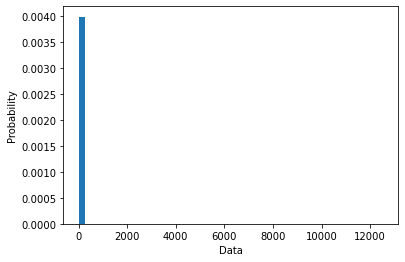

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = list(degree_list.values())

plt.hist(x, density=True, bins= 50)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

In [16]:
nx.write_gexf(G, "LANL_day30.gexf")

In [17]:
degree_list

{'U2885': 23,
 'C1979': 9,
 'U1653': 3364,
 'C2635': 6,
 'U3148': 21,
 'C3298': 30,
 'LOCAL SERVICE': 3418,
 'C11174': 7,
 'ANONYMOUS LOGON': 12522,
 'C17971': 6,
 'C740': 3,
 'U1904': 27,
 'C586': 9557,
 'C4182': 2,
 'U259': 33,
 'C2106': 9319,
 'U3220': 17,
 'U914': 34,
 'C743': 5490,
 'C16286': 4,
 'U727': 51,
 'C954': 5,
 'C5874': 6,
 'U1622': 37,
 'C549': 327,
 'U1300': 22,
 'C467': 9386,
 'U5912': 22,
 'C3758': 2257,
 'U1480': 96,
 'C5867': 9,
 'U2209': 21,
 'C528': 9372,
 'U6398': 25,
 'C1065': 9427,
 'U5226': 14,
 'U767': 39,
 'U6276': 24,
 'C1618': 2074,
 'U4078': 49,
 'C1619': 1207,
 'U7413': 30,
 'U3830': 31,
 'U9471': 45,
 'C625': 9290,
 'U5445': 19,
 'C1640': 8939,
 'U2280': 30,
 'U902': 32,
 'U1707': 14,
 'C529': 9465,
 'U6539': 23,
 'C2327': 7545,
 'U3937': 39,
 'U3646': 29,
 'C105': 1163,
 'U6601': 19,
 'C5716': 2051,
 'U5172': 16,
 'C12504': 1,
 'U8042': 35,
 'C612': 9426,
 'U7894': 18,
 'U3658': 18,
 'U10219': 11,
 'C457': 9507,
 'U521': 37,
 'C1617': 2074,
 'U11290':